In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

In [2]:
url = "https://www.worldometers.info/world-population/population-by-country/" 
page = requests.get(url) #request population url
soup = BeautifulSoup(page.content, "html.parser")

In [3]:
#find table
table = soup.find('table')

In [4]:
NUM= []
Country=[]
Population= []
YearlyChange= []
NetChange=[]
Density=[]
LandArea=[]
Migrants=[]
Fert=[]
MedAge=[]
UrbanPop=[]
WorldShare=[]

#find tr
rows = table.findAll('tr')

for row in rows:
  cells = row.findAll('td')
  if(len(cells) == 12):
    NUM.append(cells[0].find(text=True))
    Country.append(cells[1].find(text=True))
    Population.append(cells[2].find(text=True))
    YearlyChange.append(cells[3].find(text=True))
    NetChange.append(cells[4].find(text=True))
    Density.append(cells[5].find(text=True))
    LandArea.append(cells[6].find(text=True))
    Migrants.append(cells[7].find(text=True))
    Fert.append(cells[8].find(text=True))
    MedAge.append(cells[9].find(text=True))
    UrbanPop.append(cells[10].find(text=True))
    WorldShare.append(cells[11].find(text=True))

In [5]:
#store data into dataframe 
df = pd.DataFrame()
df['CountryNUM'] = NUM
df['Country'] = Country
df['Population(2020)'] = Population
df['YearlyChange'] = YearlyChange
df['NetChange'] = NetChange
df['Density(P/Km^2)'] = Density
df['LandArea'] = LandArea
df['Migrants(net)'] = Migrants
df['Fert.Rate'] = Fert
df['Med.Age'] =MedAge
df['Urban Pop%'] = UrbanPop
df['World Share'] = WorldShare

In [6]:
#drop the needless columns
df=df.drop(['CountryNUM', 'YearlyChange','NetChange','Migrants(net)','Fert.Rate'], axis=1) 

In [7]:
#drop the column does not have covid result
df=df.drop(df.index[15])
df=df.drop(df.index[24])
df=df.drop(df.index[25]) 

In [8]:
df=df.reset_index(drop=True) #reset index
df=df.drop(df.index[31:235]) #drop needless record
df.to_csv('Population.csv', index = False) #saves to csv
df=pd.read_csv('Population.csv', thousands=',') #take out all comma
df.loc[2,"Country"] = "USA" #Change the name to match the covid result
df.loc[19,"Country"] = "UK"
df

,Country,Population(2020),Density(P/Km^2),LandArea,Med.Age,Urban Pop%,World Share
0,China,1439323776,153,9388211,38,61 %,18.47 %
1,India,1380004385,464,2973190,28,35 %,17.70 %
2,USA,331002651,36,9147420,38,83 %,4.25 %
3,Indonesia,273523615,151,1811570,30,56 %,3.51 %
4,Pakistan,220892340,287,770880,23,35 %,2.83 %
5,Brazil,212559417,25,8358140,33,88 %,2.73 %
6,Nigeria,206139589,226,910770,18,52 %,2.64 %
7,Bangladesh,164689383,1265,130170,28,39 %,2.11 %
8,Russia,145934462,9,16376870,40,74 %,1.87 %
9,Mexico,128932753,66,1943950,29,84 %,1.65 %


In [9]:
url = "https://vaccovid-coronavirus-vaccine-and-treatment-tracker.p.rapidapi.com/api/npm-covid-data/countries"
headers = {
    'x-rapidapi-key': "c6c3ad45f5msha88f212c2fddf3fp145722jsn7a637a9133c4",
    'x-rapidapi-host': "vaccovid-coronavirus-vaccine-and-treatment-tracker.p.rapidapi.com"
    } #API key
r = requests.request("GET", url, headers=headers) #Get request

if(r.status_code == 200):
  data = r.json() #Read json format
  print(json.dumps(data, sort_keys=True, indent=10)) #make it more readable. 

[
          {
                    "ActiveCases": 5807793,
                    "Case_Fatality_Rate": 1.78,
                    "Country": "USA",
                    "Infection_Risk": 10.18,
                    "NewCases": 17791,
                    "NewDeaths": 453,
                    "NewRecovered": 69402,
                    "Population": 332722610,
                    "Recovery_Proporation": 81.08,
                    "Serious_Critical": 7321,
                    "Test_Percentage": 142,
                    "ThreeLetterSymbol": "usa",
                    "TotalCases": 33880485,
                    "TotalDeaths": 603861,
                    "TotalRecovered": 27468831,
                    "TotalTests": 472473929,
                    "TwoLetterSymbol": "us"
          },
          {
                    "ActiveCases": 2811027,
                    "Case_Fatality_Rate": 1.13,
                    "Country": "India",
                    "Infection_Risk": 1.91,
                    "NewCases": 

In [10]:
Country = []
TotalCases = []
TotalRecovered= []
ActiveCases=[]
TotalDeaths=[]
NewCases=[]

#the results key has the data we need
for i in range(0, 200):
  Country.append(data[i]['Country'])
  TotalCases.append(data[i]['TotalCases'])
  TotalRecovered.append(data[i]['TotalRecovered']) 
  ActiveCases.append(data[i]['ActiveCases'])
  TotalDeaths.append(data[i]['TotalDeaths'])
  NewCases.append(data[i]['NewCases'])

In [11]:
#insert data into list
covid = { 
          'Country': Country,
          'TotalCases': TotalCases,
          'TotalRecovered': TotalRecovered,
          'ActiveCases':ActiveCases,
          'TotalDeaths': TotalDeaths,
          'NewCases': NewCases
        }
#Creating the dataframe
total = pd.DataFrame(covid)
total

,Country,TotalCases,TotalRecovered,ActiveCases,TotalDeaths,NewCases
0,USA,33880485,27468831,5807793,603861,17791
1,India,26528846,23418523,2811027,299296,243777
2,Brazil,16047439,14462432,1136799,448208,71283
3,France,5593962,5195870,289566,108526,12611
4,Turkey,5178648,5013111,119466,46071,8697
...,...,...,...,...,...,...
195,Diamond Princess,712,699,0,13,0
196,Faeroe Islands,673,668,4,1,2
197,Cayman Islands,574,554,18,2,0
198,Tanzania,509,183,305,21,0


In [12]:
#merge the dataframe by using left join
project2 = pd.merge(df, total, how='left', on=['Country', 'Country']) 
project2

,Country,Population(2020),Density(P/Km^2),LandArea,Med.Age,Urban Pop%,World Share,TotalCases,TotalRecovered,ActiveCases,TotalDeaths,NewCases
0,China,1439323776,153,9388211,38,61 %,18.47 %,90954,86017,301,4636,10
1,India,1380004385,464,2973190,28,35 %,17.70 %,26528846,23418523,2811027,299296,243777
2,USA,331002651,36,9147420,38,83 %,4.25 %,33880485,27468831,5807793,603861,17791
3,Indonesia,273523615,151,1811570,30,56 %,3.51 %,1769940,1629495,91240,49205,5296
4,Pakistan,220892340,287,770880,23,35 %,2.83 %,897468,813855,63436,20177,4007
5,Brazil,212559417,25,8358140,33,88 %,2.73 %,16047439,14462432,1136799,448208,71283
6,Nigeria,206139589,226,910770,18,52 %,2.64 %,165944,156462,7415,2067,0
7,Bangladesh,164689383,1265,130170,28,39 %,2.11 %,787726,729798,45580,12348,1028
8,Russia,145934462,9,16376870,40,74 %,1.87 %,4992554,4610465,263964,118125,8709
9,Mexico,128932753,66,1943950,29,84 %,1.65 %,2392744,1909187,262301,221256,2604


In [13]:
project2['Death rate']=(project2['TotalDeaths']/project2['TotalRecovered'])*100 #calculate the death 
project2['Recovery rate']=(project2['TotalRecovered']/project2['TotalCases'])*100 #calculate the recovery rate 
project2['Infection rate']=(project2['TotalCases']/project2['Population(2020)'])*100 #calculate the infection rate

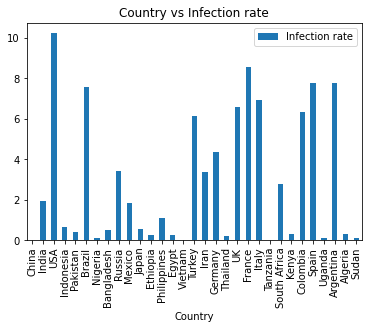

In [14]:
#create a bar plot from the dataframe 
dv=pd.DataFrame(project2,columns=['Country','Infection rate'])
dv.plot(x="Country", y ="Infection rate", title ='Country vs Infection rate', kind = "bar")

In [15]:
#save to csv file
project2.to_csv('Project2.csv', index = False)